In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_c12_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55         12.9107 (10.1184, 17.7400) ( 9.7746, 17.0085)  7.2338 (Jnode 106)\n',
 't_n56         12.5591 ( 9.9248, 17.2500) ( 9.6172, 16.5259)  6.9087 (Jnode 105)\n',
 't_n57         11.5514 ( 9.2020, 15.8251) ( 8.8887, 15.1551)  6.2664 (Jnode 104)\n',
 't_n58          9.7996 ( 7.9043, 13.3599) ( 7.6364, 12.8087)  5.1723 (Jnode 103)\n',
 't_n59          9.3981 ( 7.5917, 12.8085) ( 7.3389, 12.2809)  4.9420 (Jnode 102)\n',
 't_n60          8.9167 ( 7.2132, 12.1467) ( 6.9602, 11.6282)  4.6680 (Jnode 101)\n',
 't_n61          8.1739 ( 6.6255, 11.1475) ( 6.4220, 10.6978)  4.2758 (Jnode 100)\n',
 't_n62          4.3100 ( 2.7696,  6.1415) ( 2.6868,  6.0114)  3.3246 (Jnode 99)\n',
 't_n63          5.8777 ( 4.8096,  8.0338) ( 4.6490,  7.6430)  2.9940 (Jnode 98)\n',
 't_n64          4.3449 ( 3.3903,  6.0017) ( 3.2742,  5.7814)  2.5072 (Jnode 97)\n',
 't_n65          3.7661 ( 2.8868,  5.2355) ( 2.7876,  5.0583)  2.2708 (Jnode 96)\n',
 't_n66          2.8961 ( 2.1667,  4.0861) ( 2.0814,  3.93

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[12.9107,
 12.5591,
 11.5514,
 9.7996,
 9.3981,
 8.9167,
 8.1739,
 4.31,
 5.8777,
 4.3449,
 3.7661,
 2.8961,
 1.941,
 1.2773,
 0.5487,
 4.2333,
 9.0341,
 7.9935,
 8.1156,
 5.7873,
 5.0408,
 4.8173,
 8.8606,
 8.3293,
 7.9649,
 7.4927,
 6.8406,
 6.5742,
 5.6779,
 5.1394,
 4.6354,
 3.4994,
 3.0946,
 5.8291,
 4.6539,
 8.627,
 2.0241,
 8.3597,
 7.728,
 6.8012,
 6.2086,
 4.5995,
 5.0259,
 6.5752,
 6.2032,
 5.5096,
 4.5238,
 5.5223,
 10.4075,
 7.8745,
 4.9903,
 4.5868,
 8.998]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_c12_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[14.0783,
 13.698,
 12.2295,
 10.3244,
 9.7724,
 9.1125,
 8.1834,
 4.3892,
 5.8578,
 4.2587,
 3.5962,
 2.6985,
 1.7797,
 1.1745,
 0.5007,
 4.1981,
 9.2075,
 7.5331,
 8.1561,
 5.8391,
 4.9587,
 4.8774,
 9.275,
 8.6121,
 8.1564,
 7.5918,
 6.8935,
 6.5357,
 5.598,
 4.97,
 4.387,
 3.2787,
 2.7854,
 5.808,
 4.5801,
 8.9384,
 2.3536,
 8.5683,
 7.8384,
 6.8007,
 6.105,
 4.4976,
 4.7786,
 6.5895,
 6.0178,
 5.1061,
 4.5122,
 5.6514,
 10.8098,
 8.0797,
 5.0143,
 4.8217,
 10.0612]

In [12]:
posterior_mean_iqtree

[12.9107,
 12.5591,
 11.5514,
 9.7996,
 9.3981,
 8.9167,
 8.1739,
 4.31,
 5.8777,
 4.3449,
 3.7661,
 2.8961,
 1.941,
 1.2773,
 0.5487,
 4.2333,
 9.0341,
 7.9935,
 8.1156,
 5.7873,
 5.0408,
 4.8173,
 8.8606,
 8.3293,
 7.9649,
 7.4927,
 6.8406,
 6.5742,
 5.6779,
 5.1394,
 4.6354,
 3.4994,
 3.0946,
 5.8291,
 4.6539,
 8.627,
 2.0241,
 8.3597,
 7.728,
 6.8012,
 6.2086,
 4.5995,
 5.0259,
 6.5752,
 6.2032,
 5.5096,
 4.5238,
 5.5223,
 10.4075,
 7.8745,
 4.9903,
 4.5868,
 8.998]

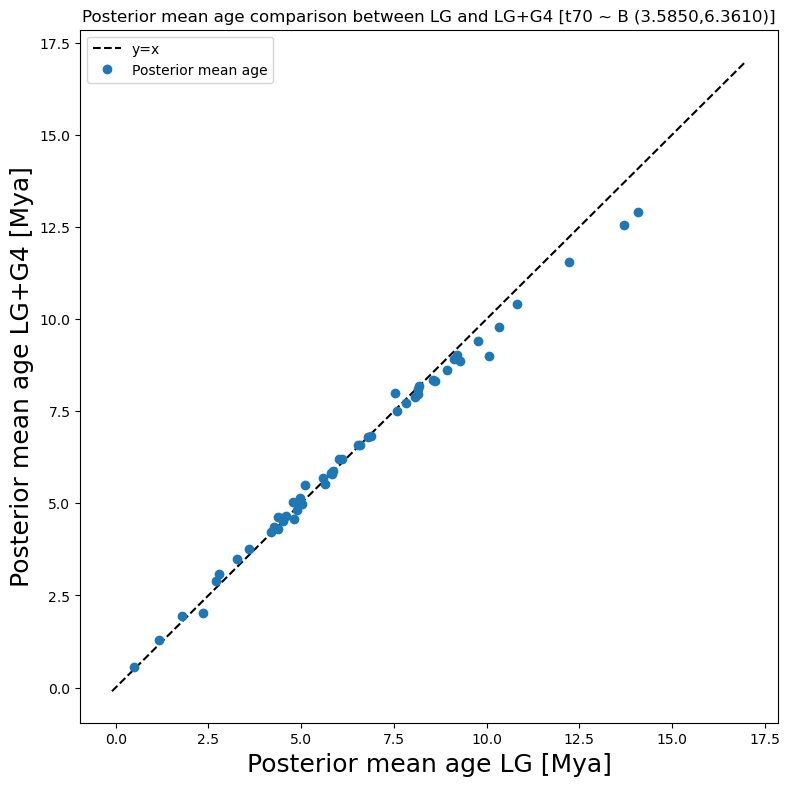

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t70 ~ B (3.5850,6.3610)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_c12_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')